In [1]:
#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

In [3]:
data=pd.read_csv('C:/Users/csang/OneDrive/Desktop/Discrimination of Genuine and Acted Emotional Expressions using EEG Signal and Machine Learning/input/emotions.csv')
                # ../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

In [4]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.shape

(2132, 2549)

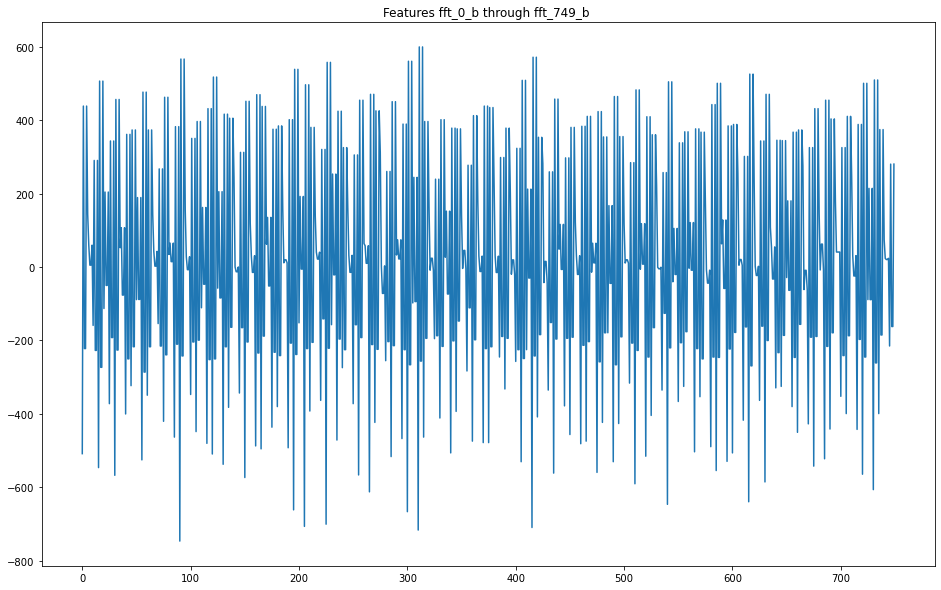

In [8]:
sample=data.loc[0,'fft_0_b':'fft_749_b']
plt.figure(figsize=(16,10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b ")
plt.show()

In [9]:
data['label'].value_counts()

NEUTRAL     716
POSITIVE    708
NEGATIVE    708
Name: label, dtype: int64

In [10]:
label_mapping={'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2}

#preprocessing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
def preprocess_inputs(df):
    df=df.copy()
    
    df['label']=df['label'].replace(label_mapping)
    y=df['label'].copy()
    X=df.drop('label',axis=1).copy()
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
    
    return X_train,X_test,y_train,y_test


In [13]:
X_train,X_test,y_train,y_test=preprocess_inputs(data)

In [14]:
X_train.head(3)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.5,22.9,-3.63,-2.22,-2.18,-3.24,-4.04,...,-50.0,150.0,-150.0,-150.0,150.0,63.6,83.8,-40.9,-40.9,83.8
1851,13.700,22.8,21.5,8.4,27.1,3.27,1.12,6.48,2.30,5.66,...,74.2,-76.0,-10.9,-10.9,-76.0,60.9,-60.4,-31.4,-31.4,-60.4
1253,-0.765,24.7,-578.0,11.9,27.9,-1.44,-4.20,-8.31,-4.34,4.04,...,-803.0,619.0,-331.0,-331.0,619.0,-551.0,545.0,-261.0,-261.0,545.0


Modelling.Use tensorflow for RNN

In [15]:
inputs=tf.keras.Input(shape=(X_train.shape[1]))
inputs

<tf.Tensor 'input_1:0' shape=(None, 2548) dtype=float32>

In [16]:
inputs=tf.keras.Input(shape=(X_train.shape[1]))

x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)

outputs=tf.keras.layers.Dense(3,activation='softmax')(x)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
dense (Dense)                (None, 64)                163136    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
38/38 [==============================] - 0s 6ms/step - loss: 21085730897920.0000 - accuracy: 0.5650 - val_loss: 1251064676352.0000 - val_accuracy: 0.5819
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 3486182539264.0000 - accuracy: 0.5482 - val_loss: 245811937280.0000 - val_accuracy: 0.5753
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 46489367740416.0000 - accuracy: 0.5306 - val_loss: 29929244721152.0000 - val_accuracy: 0.5452
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 40295777435648.0000 - accuracy: 0.5700 - val_loss: 23057039097856.0000 - val_accuracy: 0.5819
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 30594549415936.0000 - accuracy: 0.5448 - val_loss: 28074334748672.0000 - val_accuracy: 0.5719
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 21881228886016.0000 - accuracy: 0.5448 - val_loss: 2388378779648.0000 - val_accuracy: 0.6856
Epoch 7/2

In [19]:
model_acc=model.evaluate(X_test,y_test,verbose=0)[1]
print("Test Accuracy:{:.3f}".format(model_acc*100))

Test Accuracy:51.875


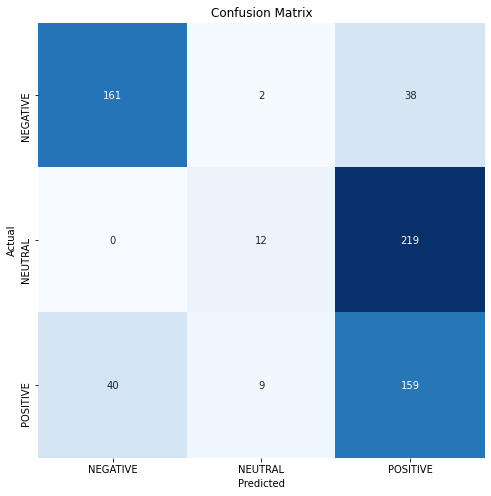

Classification report
-------------------------
               precision    recall  f1-score   support

    NEGATIVE       0.80      0.80      0.80       201
     NEUTRAL       0.52      0.05      0.09       231
    POSITIVE       0.38      0.76      0.51       208

    accuracy                           0.52       640
   macro avg       0.57      0.54      0.47       640
weighted avg       0.56      0.52      0.45       640



In [20]:
y_pred=np.array(list(map(lambda x: np.argmax(x),model.predict(X_test))))
cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=label_mapping.keys())

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,vmin=0,fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5, label_mapping.keys())
plt.yticks(np.arange(3)+0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification report\n-------------------------\n",clr)

RNN

In [21]:
inputs=tf.keras.Input(shape=(X_train.shape[1]))

expand_dims=tf.expand_dims(inputs, axis=2)
gru=tf.keras.layers.GRU(256,return_sequences=True)(expand_dims)
flatten=tf.keras.layers.Flatten()(gru)

outputs=tf.keras.layers.Dense(3,activation='softmax')(flatten)

model=tf.keras.Model(inputs=inputs,outputs=outputs)

print(model.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
tf_op_layer_ExpandDims (Tens [(None, 2548, 1)]         0         
_________________________________________________________________
gru (GRU)                    (None, 2548, 256)         198912    
_________________________________________________________________
flatten (Flatten)            (None, 652288)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1956867   
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
38/38 [==============================] - 779s 21s/step - loss: 44.9464 - accuracy: 0.7402 - val_loss: 17.2011 - val_accuracy: 0.8997
Epoch 2/20
38/38 [==============================] - 803s 21s/step - loss: 8.1838 - accuracy: 0.9044 - val_loss: 9.3461 - val_accuracy: 0.8161
Epoch 3/20
38/38 [==============================] - 966s 25s/step - loss: 1.4243 - accuracy: 0.9623 - val_loss: 3.4943 - val_accuracy: 0.9298
Epoch 4/20
38/38 [==============================] - 963s 25s/step - loss: 1.2452 - accuracy: 0.9640 - val_loss: 3.5373 - val_accuracy: 0.9298
Epoch 5/20
38/38 [==============================] - 974s 26s/step - loss: 1.7749 - accuracy: 0.9589 - val_loss: 2.3346 - val_accuracy: 0.9498
Epoch 6/20
38/38 [==============================] - 967s 25s/step - loss: 0.6418 - accuracy: 0.9866 - val_loss: 0.9057 - val_accuracy: 0.9632
Epoch 7/20
38/38 [==============================] - 992s 26s/step - loss: 0.4517 - accuracy: 0.9866 - val_loss: 3.3077 - val_accuracy: 0.9465
Epoc

ACTED--NEGATIVE
NUTRAL
GENUINE--POSITIVE

In [23]:
model_acc=model.evaluate(X_test,y_test,verbose=0)[1]
print("Test Accuracy:{:.3f}".format(model_acc*100))

Test Accuracy:95.781


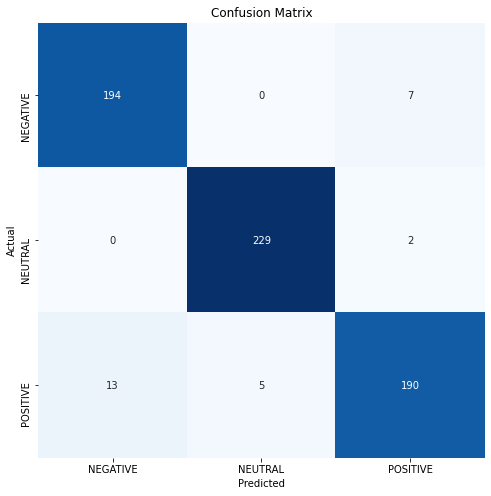

Classification report
-------------------------
               precision    recall  f1-score   support

    NEGATIVE       0.94      0.97      0.95       201
     NEUTRAL       0.98      0.99      0.98       231
    POSITIVE       0.95      0.91      0.93       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



In [24]:
y_pred=np.array(list(map(lambda x: np.argmax(x),model.predict(X_test))))
cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=label_mapping.keys())

plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,vmin=0,fmt='g',cbar=False,cmap='Blues')
plt.xticks(np.arange(3)+0.5, label_mapping.keys())
plt.yticks(np.arange(3)+0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification report\n-------------------------\n",clr)